/tmp/ipykernel_25039/124313657.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
/tmp/ipykernel_25039/

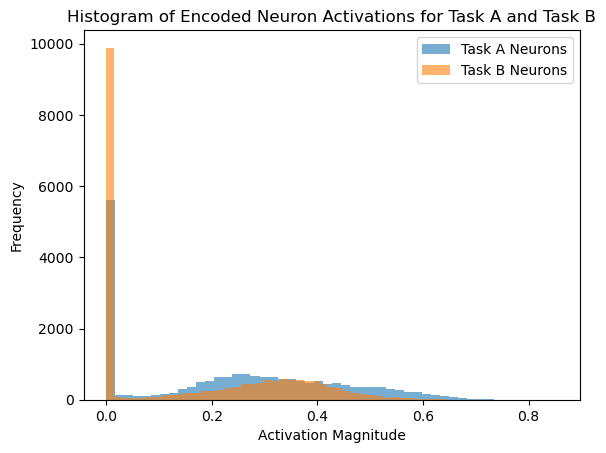

In [11]:
import sys
import os

from autoencoder import SparseAutoencoder
from utils import load_data

import torch
import matplotlib.pyplot as plt

# Ensure required directories exist
os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)

# Load saved models and activation data
task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
task_b_autoencoder = torch.load("../models/task_b_autoencoder.pth")
task_a_activations = torch.load("../data/task_a_activations.pt")
task_b_activations = torch.load("../data/task_b_activations.pt")

# Encode activations for visualization
encoded_a, _ = task_a_autoencoder(task_a_activations)
encoded_b, _ = task_b_autoencoder(task_b_activations)

# Plot histogram
plt.hist(encoded_a.detach().numpy().flatten(), bins=50, alpha=0.6, label="Task A Neurons")
plt.hist(encoded_b.detach().numpy().flatten(), bins=50, alpha=0.6, label="Task B Neurons")
plt.xlabel("Activation Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Encoded Neuron Activations for Task A and Task B")
plt.show()


In [12]:
mean_activation_a = encoded_a.mean().item()
mean_activation_b = encoded_b.mean().item()
print(f"Mean Activation for Task A: {mean_activation_a}")
print(f"Mean Activation for Task B: {mean_activation_b}")


Mean Activation for Task A: 0.24188944697380066
Mean Activation for Task B: 0.16158844530582428


In [13]:
sparsity_a = (encoded_a < 1e-3).float().mean().item()
sparsity_b = (encoded_b < 1e-3).float().mean().item()
print(f"Sparsity for Task A: {sparsity_a * 100:.2f}%")
print(f"Sparsity for Task B: {sparsity_b * 100:.2f}%")


Sparsity for Task A: 27.00%
Sparsity for Task B: 48.93%


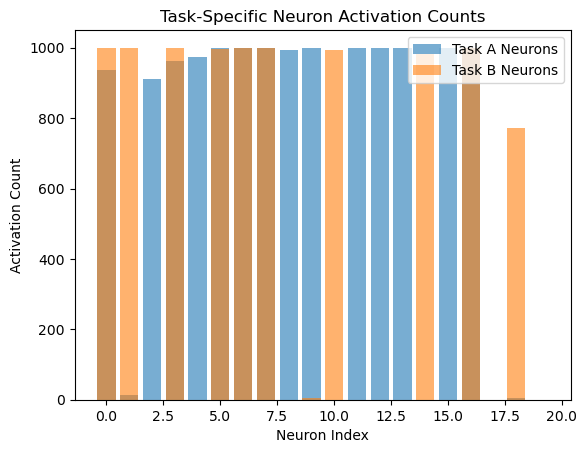

In [14]:
active_neurons_a = (encoded_a > 0.1).sum(dim=0)  # Count of times each neuron activates for Task A
active_neurons_b = (encoded_b > 0.1).sum(dim=0)  # Count of times each neuron activates for Task B

plt.bar(range(len(active_neurons_a)), active_neurons_a, alpha=0.6, label="Task A Neurons")
plt.bar(range(len(active_neurons_b)), active_neurons_b, alpha=0.6, label="Task B Neurons")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Count")
plt.legend()
plt.title("Task-Specific Neuron Activation Counts")
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt

# Load the trained autoencoders and task activations
task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
task_b_autoencoder = torch.load("../models/task_b_autoencoder.pth")
task_a_activations = torch.load("../data/task_a_activations.pt")
task_b_activations = torch.load("../data/task_b_activations.pt")

# Get encoded representations for each task
encoded_a, _ = task_a_autoencoder(task_a_activations)
encoded_b, _ = task_b_autoencoder(task_b_activations)

# Convert to numpy for easy manipulation
encoded_a_np = encoded_a.detach().numpy()
encoded_b_np = encoded_b.detach().numpy()

# Calculate the average activation per neuron for each task
avg_activation_a = encoded_a_np.mean(axis=0)
avg_activation_b = encoded_b_np.mean(axis=0)

# Plot average activations for each neuron in Task A and Task B
plt.figure(figsize=(10, 6))
plt.plot(avg_activation_a, label="Task A", marker='o', linestyle='-', color="blue", alpha=0.7)
plt.plot(avg_activation_b, label="Task B", marker='o', linestyle='-', color="orange", alpha=0.7)
plt.xlabel("Neuron Index")
plt.ylabel("Average Activation")
plt.title("Average Activation per Neuron for Task A and Task B")
plt.legend()
plt.show()

# Identify task-specific neurons by checking significant differences
threshold = 0.05  # Define a threshold for considering a difference significant
task_specific_neurons = {
    "Task A Specific": [i for i, (a, b) in enumerate(zip(avg_activation_a, avg_activation_b)) if a - b > threshold],
    "Task B Specific": [i for i, (a, b) in enumerate(zip(avg_activation_a, avg_activation_b)) if b - a > threshold]
}

# Display task-specific neurons
print("Task A Specific Neurons:", task_specific_neurons["Task A Specific"])
print("Task B Specific Neurons:", task_specific_neurons["Task B Specific"])


/tmp/ipykernel_25039/1657800217.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task_a_autoencoder = torch.load("models/task_a_autoencoder.pth")


FileNotFoundError: [Errno 2] No such file or directory: 'models/task_a_autoencoder.pth'